In [2]:
import os
import mne
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy.signal as signal

In [3]:
homepath = os.getcwd()


In [19]:
path = os.path.dirname(homepath)

path = os.path.dirname(path)
path = os.path.dirname(path)
path = os.path.join(
    path, 'dyskinesia_neurophys', 'data',
    'preprocessed_data', 'sub-023', 'v4.0')

f1 = 'data_023_tap_Dopa10_v4.0_acc_left_512Hz.npy'
f2 = 'names_023_tap_Dopa10_v4.0_acc_left.csv'
f3 = 'data_023_tap_Dopa10_v4.0_lfp_right_2048Hz.npy'
f4 = 'names_023_tap_Dopa10_v4.0_lfp_right.csv'

dat = np.load(os.path.join(path, f1), allow_pickle=True)
channels = pd.read_csv(os.path.join(path, f2))
channels = list(channels.keys())

dat2 = np.load(os.path.join(path, f3), allow_pickle=True)
channels2 = pd.read_csv(os.path.join(path, f4))
channels2 = list(channels2.keys())

d = {c: a for c,a in zip(channels, dat)}
acc = d['ACC_L_X'][5000:-5000]

d2 = {c: a for c,a in zip(channels2, dat2)}
lfp = d2['LFP_R_01'] - d2['LFP_R_05']
lfp_t = d2['dopa_time']

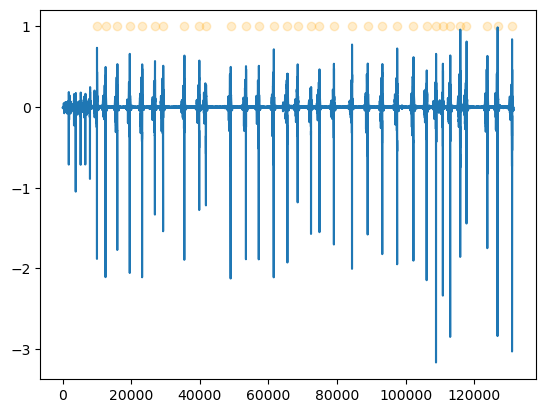

[512. 512. 512. 512.]
33


In [20]:
sel_idx = np.where(acc < -1)[0]
sel = acc < -1

sel_df = np.diff(sel_idx)
sel_idx = sel_idx[1:][sel_df > 500]

sel_t = d['dopa_time'][sel_idx]

plt.plot(acc,)
plt.scatter(sel_idx, np.ones(len(sel_idx)), alpha=.2, color='orange')
# plt.xlim(0, 5000)
plt.show()


print(1 / np.diff(d['dopa_time'][:5]))
print(len(sel_idx))

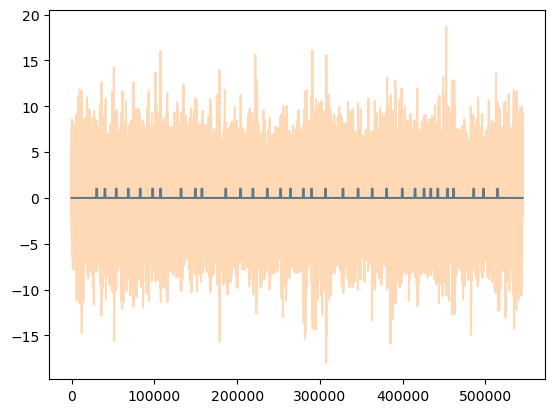

In [21]:


i_lfp_sel = [np.where(lfp_t == i)[0][0] for i in sel_t]

lfp_sel = np.zeros(len(lfp))
for i in i_lfp_sel:
    lfp_sel[i:i + 1024] = 1

plt.plot(lfp_sel)
plt.plot(lfp, alpha=.3,)
# plt.xlim(200000, 210000)
plt.show()

(1.0, 35.0)

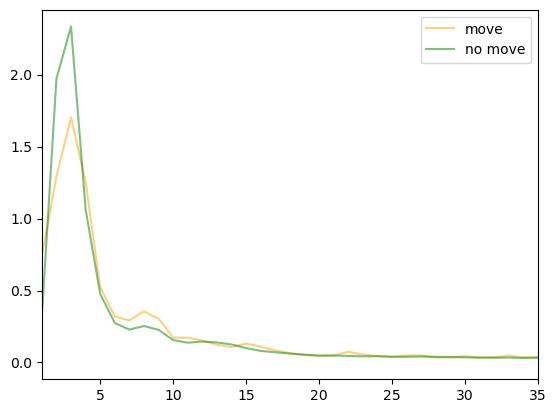

In [22]:
l = lfp[lfp_sel.astype(bool)]
freq, psx = signal.welch(l, fs=2048, nperseg=2048,)
frq = freq[freq<100]
psx = psx[freq<100]

l2 = lfp[~lfp_sel.astype(bool)]
freq2, psx2 = signal.welch(l2, fs=2048, nperseg=2048,)
frq2 = freq2[freq2<100]
psx2 = psx2[freq2<100]


plt.plot(frq, psx, color='orange', alpha=.5, label='move',)

plt.plot(frq2, psx2, color='green', alpha=.5, label='no move')

plt.legend()

plt.xlim(1, 35)

In [7]:
f1 = 'data_023_tap_Dopa60_v4.0_acc_left_512Hz.npy'
f2 = 'names_023_tap_Dopa60_v4.0_acc_left.csv'
f3 = 'data_023_tap_Dopa60_v4.0_lfp_right_2048Hz.npy'
f4 = 'names_023_tap_Dopa60_v4.0_lfp_right.csv'

dat = np.load(os.path.join(path, f1), allow_pickle=True)
channels = pd.read_csv(os.path.join(path, f2))
channels = list(channels.keys())

dat2 = np.load(os.path.join(path, f3), allow_pickle=True)
channels2 = pd.read_csv(os.path.join(path, f4))
channels2 = list(channels2.keys())


d = {c: a for c,a in zip(channels, dat)}
acc = d['ACC_L_X'][5000:-5000]

d2 = {c: a for c,a in zip(channels2, dat2)}
lfp = d2['LFP_R_01'] - d2['LFP_R_02']
lfp_t = d2['dopa_time']

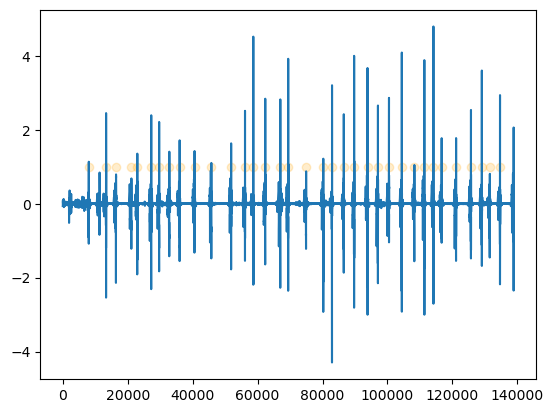

35


In [8]:
sel_idx = np.where(acc < -1)[0]
sel = acc < -1

sel_df = np.diff(sel_idx)
sel_idx = sel_idx[:-1][sel_df > 500]

sel_t = d['dopa_time'][sel_idx]

plt.plot(acc,)
plt.scatter(sel_idx, np.ones(len(sel_idx)), alpha=.2, color='orange')
# plt.xlim(0, 5000)
plt.show()


print(len(sel_idx))

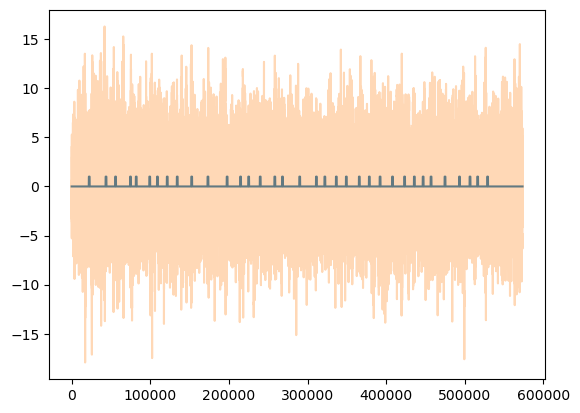

In [9]:


i_lfp_sel = [np.where(lfp_t == i)[0][0] for i in sel_t]

lfp_sel = np.zeros(len(lfp))
for i in i_lfp_sel:
    lfp_sel[i:i + 1024] = 1

plt.plot(lfp_sel)
plt.plot(lfp, alpha=.3,)
# plt.xlim(200000, 210000)
plt.show()

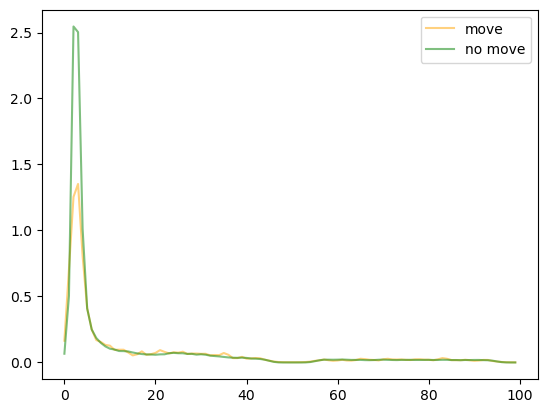

In [10]:
l = lfp[lfp_sel.astype(bool)]
freq, psx = signal.welch(l, fs=2048, nperseg=2048,)
frq = freq[freq<100]
psx = psx[freq<100]

l2 = lfp[~lfp_sel.astype(bool)]
freq2, psx2 = signal.welch(l2, fs=2048, nperseg=2048,)
frq2 = freq2[freq2<100]
psx2 = psx2[freq2<100]


plt.plot(frq, psx, color='orange', alpha=.5, label='move',)

plt.plot(frq2, psx2, color='green', alpha=.5, label='no move')

plt.legend()